<a href="https://colab.research.google.com/github/MunjaSangeetha/Generative-AI/blob/main/Assignment_7_1_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M.Sangeetha
2303A52088
Generative AI
Assignment - 7.1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.1712 - loss: 0.7137 - val_accuracy: 0.2569 - val_loss: 0.7153
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1957 - loss: 0.7123 - val_accuracy: 0.2569 - val_loss: 0.7153
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2051 - loss: 0.7113 - val_accuracy: 0.2569 - val_loss: 0.7152
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1756 - loss: 0.7111 - val_accuracy: 0.2569 - val_loss: 0.7151
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1978 - loss: 0.7110 - val_accuracy: 0.2569 - val_loss: 0.7150
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1908 - loss: 0.7116 - val_accuracy: 0.2569 - val_loss: 0.7150
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1869 - loss: 0.7120 - val_accuracy: 0.2569 - val_loss: 0.7149
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1879 - loss: 0.7127 - val_accuracy: 0.2569 - val_loss: 0.

Training Accuracy: 0.3692660629749298
Testing Accuracy: 0.39449542760849
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Precision: 1.0
Recall: 0.3944954128440367
F1-Score: 0.5657894736842105


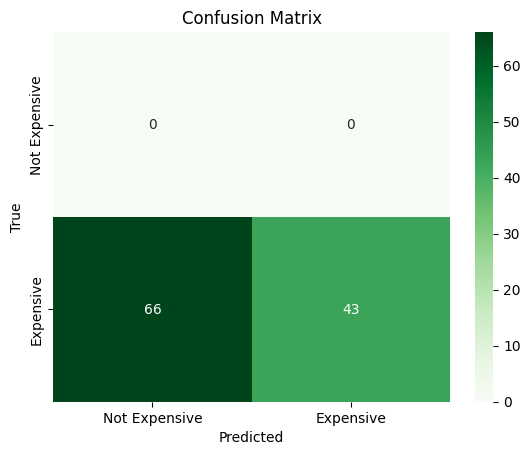

In [20]:
# Step 1: Import necessary libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model

# Step 2: Load the dataset (replace 'path_to_your_dataset.csv' with the actual path)
# Load the dataset (make sure it's in the correct format)
dataset = pd.read_csv('/content/Housing (3).csv')  # Replace with your actual dataset path
# Step 3: Preprocess the data
# Assuming the target variable is 'price' and we are predicting whether a house is expensive or not
# For this, we can create a binary classification task by using a threshold, such as price > 200k

dataset['expensive'] = (dataset['price'] > 200000).astype(int)  # Create a binary classification column
X = dataset.drop(columns=['price', 'expensive'])  # Features
y = dataset['expensive']  # Target variable (binary: 1 = expensive, 0 = not expensive)

# Convert string columns to numerical using one-hot encoding
# Identify string (object) columns
str_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to string columns
X = pd.get_dummies(X, columns=str_cols, drop_first=True) # drop_first to avoid multicollinearity

# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the ANN model
model = Sequential()

# Hidden Layer 1 (8 neurons, ReLU activation)
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))

# Hidden Layer 2 (16 neurons, ReLU activation)
model.add(Dense(16, activation='relu'))

# Hidden Layer 3 (20 neurons, ReLU activation)
model.add(Dense(20, activation='relu'))

# Hidden Layer 4 (10 neurons, ReLU activation)
model.add(Dense(10, activation='relu'))

# Output Layer (1 neuron for binary classification with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Step 6: Compile the model
model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

# Step 8: Evaluate the model on the test data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Output training and testing accuracy
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

# Step 9: Save the model to a .h5 file
model.save('diabetes_diagnosis_model.h5')

# Step 10: Calculate confusion matrix and classification metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Expensive', 'Expensive'], yticklabels=['Not Expensive', 'Expensive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
